
# 📊 Exploratory Data Analysis (EDA)
**Project:** Прогнозування Відтоку Клієнтів  
**Author:** Andrii Derenhovskyi  
**Team Lead:** Vitalii Subbotin  
**Date:** 2025-10-09
---


In [2]:

# ============================================
#  Імпорт бібліотек
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

# ============================================
#  Завантаження даних
# ============================================
data_path = "../data/internet_service_churn.csv"
df = pd.read_csv(data_path, index_col=False)

print("🔹 Розмір датасету:", df.shape)
df.head()

🔹 Розмір датасету: (72274, 11)


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:

# ============================================
#  Загальна інформація про дані
# ============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


🔹 Кількість пропусків:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


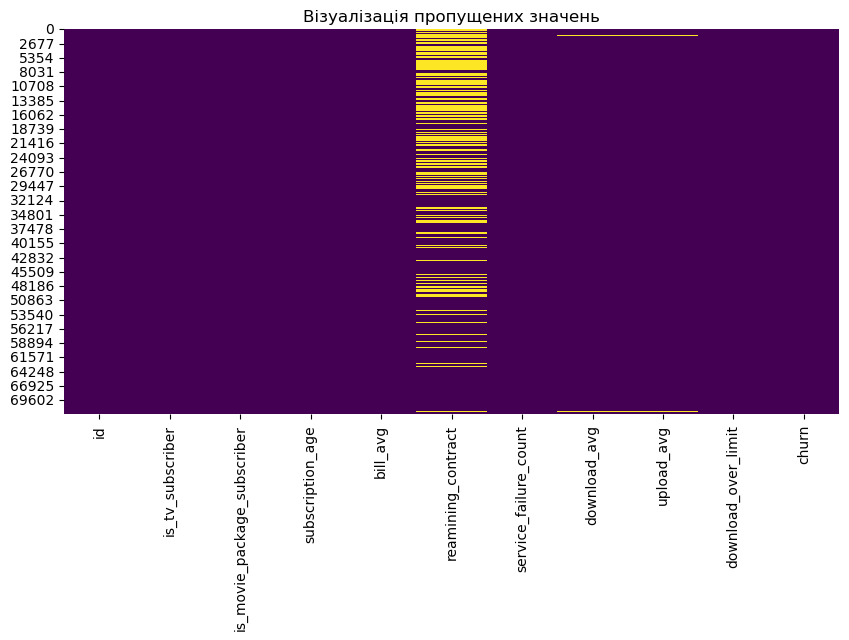

In [7]:

# ============================================
#  Перевірка пропущених значень
# ============================================
print("🔹 Кількість пропусків:")
print(df.isnull().sum())

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Візуалізація пропущених значень")
plt.show()

Дані переважно чисті, але головний виклик — це обробка значної кількості пропусків у колонці reamining_contract. Ця особливість вимагає окремого дослідження.

In [14]:

# ============================================
#  Описова статистика
# ============================================
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


Дані містять аномалії (негативний вік) та значні викиди у фінансових та трафікових показниках. Це потрібно буде врахувати на етапі підготовки даних (Data Preprocessing).

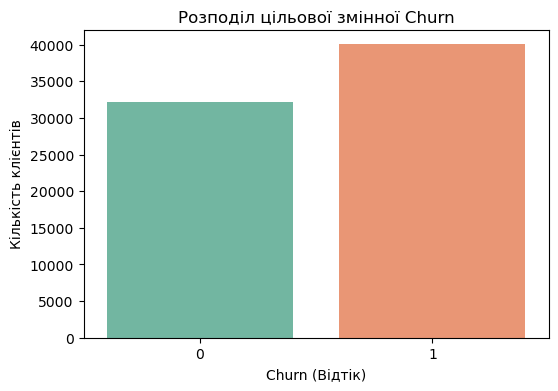

In [12]:

# ============================================
#  Розподіл цільової змінної
# ============================================
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="Set2", hue="churn", legend=False)
plt.title("Розподіл цільової змінної Churn")
plt.xlabel("Churn (Відтік)")
plt.ylabel("Кількість клієнтів")
plt.show()

Цільова змінна має невеликий дисбаланс у бік класу "відтік".

In [ ]:
discrete_variables = ['service_failure_count', 'download_over_limit']
continuous_variables = ['subscription_age', 'bill_avg', 'reamining_contract', 'download_avg', 'upload_avg']
categorical_variables = ['is_tv_subscriber', 'is_movie_package_subscriber']

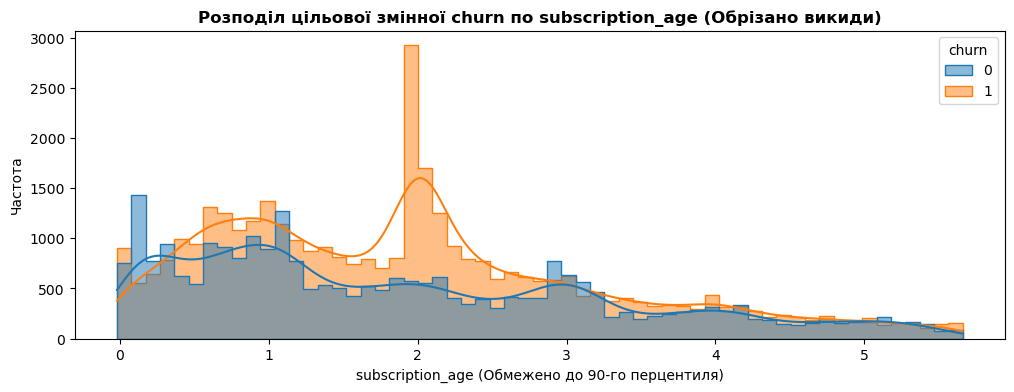

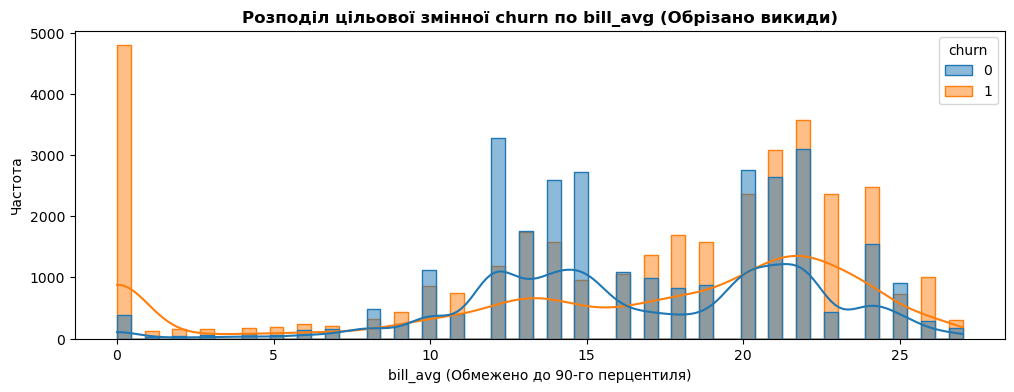

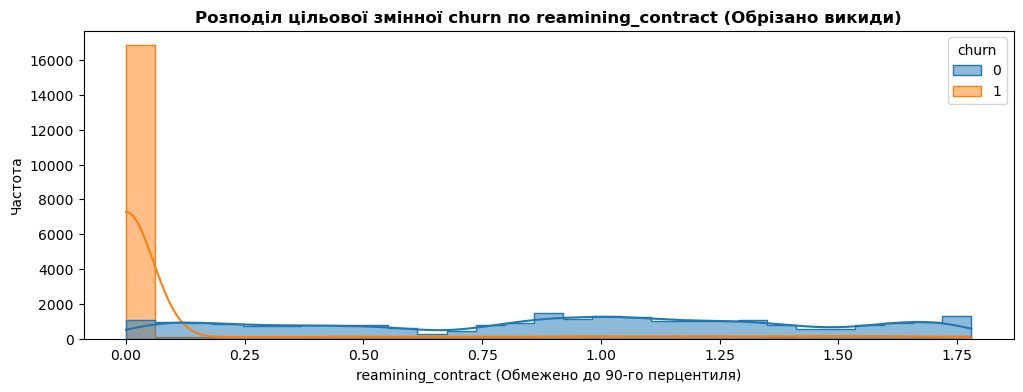

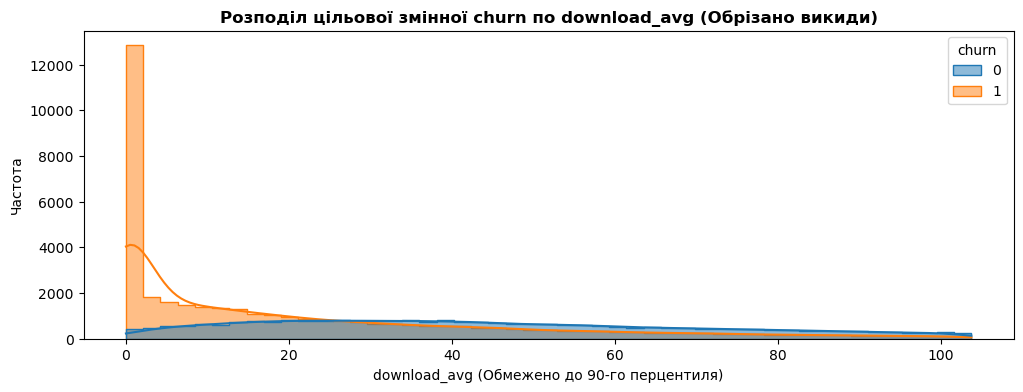

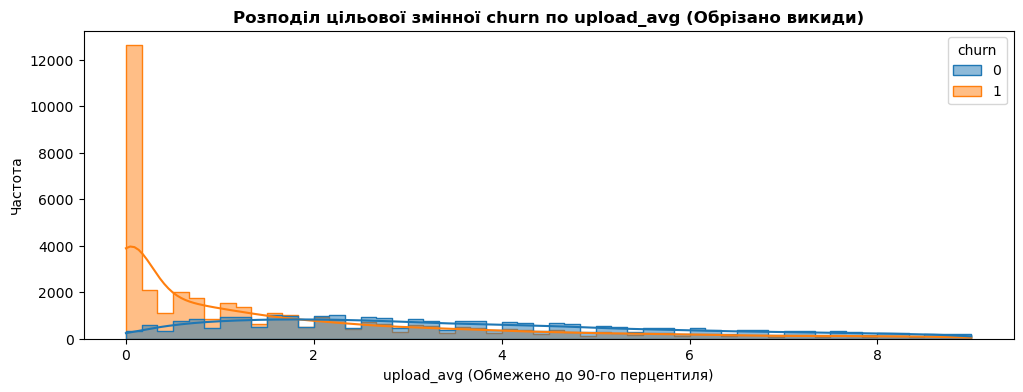

In [25]:
quantile_level = 0.90
for var in continuous_variables:
    limit = df[var].dropna().quantile(quantile_level) 
    df_limited = df[df[var] < limit]
    plt.figure(figsize=(12, 4))
    sns.histplot(data=df_limited, x=var, hue='churn', kde=True, element='step', alpha=0.5)
    
    plt.xlabel(f'{var} (Обмежено до {quantile_level*100:.0f}-го перцентиля)')
    plt.ylabel('Частота')
    plt.title(f'Розподіл цільової змінної churn по {var} (Обрізано викиди)', fontweight='bold')
    plt.show()

Найбільш очевидні фактори ризику — короткий термін підписки та закінчення терміну дії контракту.

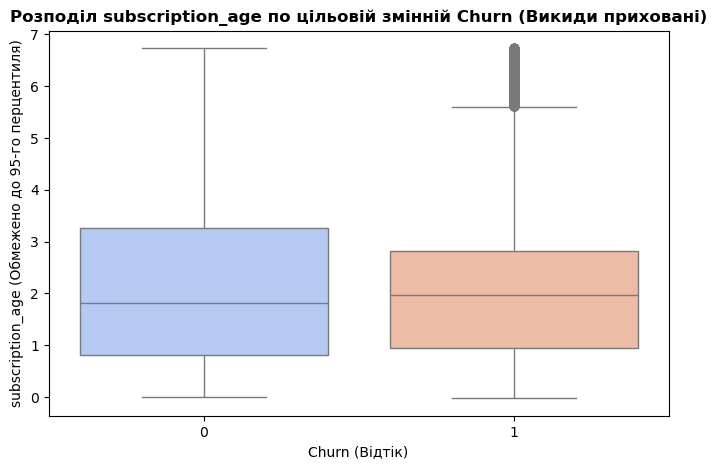

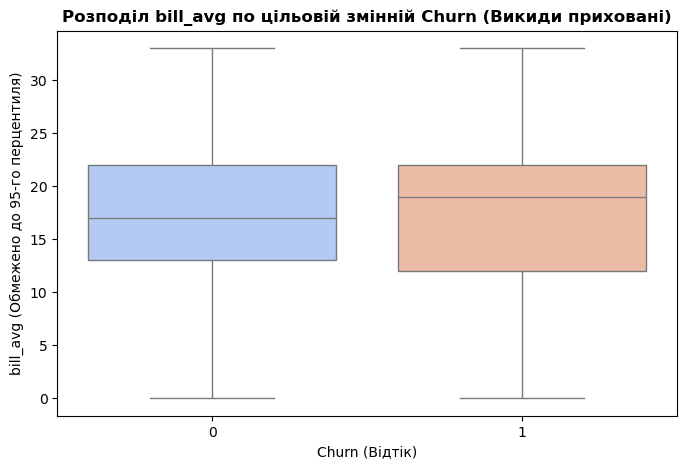

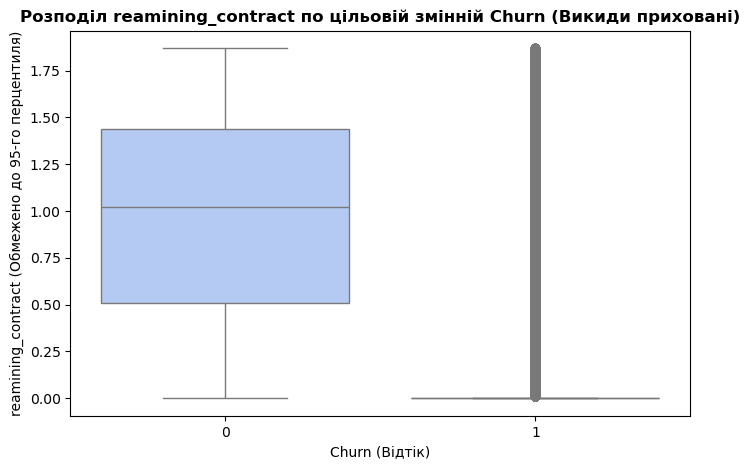

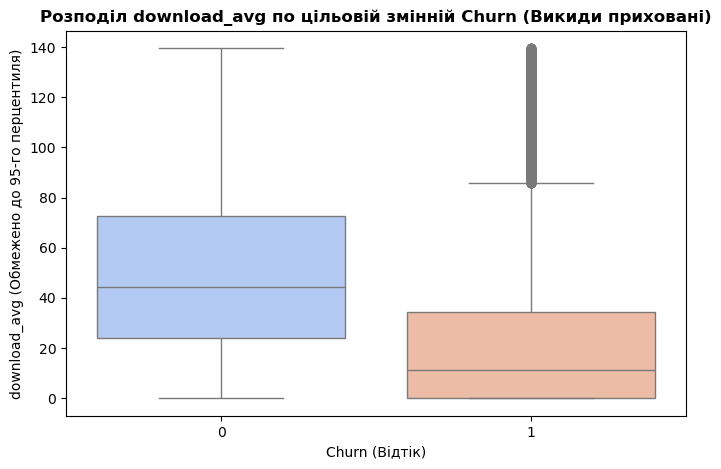

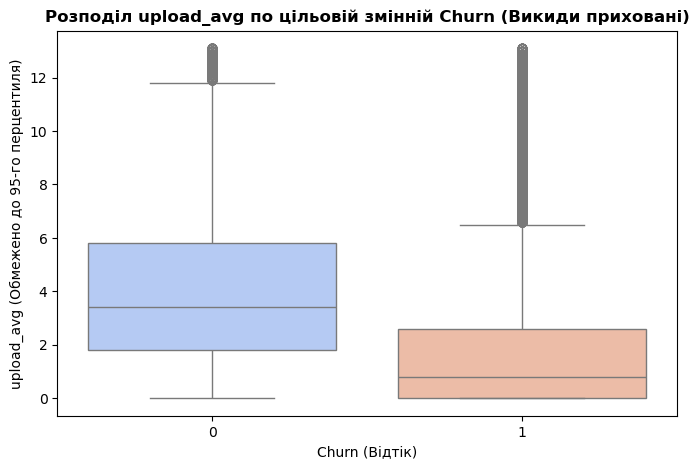

In [ ]:
quantile_level = 0.95

for var in continuous_variables:
    limit = df[var].dropna().quantile(quantile_level) 
    
    df_limited = df[df[var] < limit].copy()
    plt.figure(figsize=(8, 5))
    
    sns.boxplot(data=df_limited, x='churn', y=var, palette="coolwarm", hue='churn', legend=False)
    
    plt.xlabel('Churn (Відтік)')
    plt.ylabel(f'{var} (Обмежено до {quantile_level*100:.0f}-го перцентиля)')
    plt.title(f'Розподіл {var} по цільовій змінній Churn (Викиди приховані)', fontweight='bold')
    plt.show()

Найбільш очевидні фактори ризику — короткий термін підписки та закінчення терміну дії контракту. Також неактивність клієнта (нульовий трафік) є тривожним сигналом.

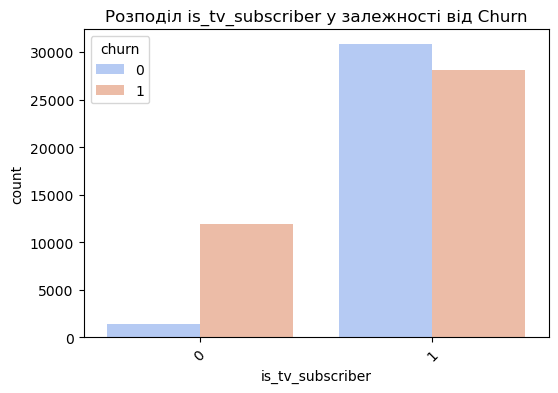

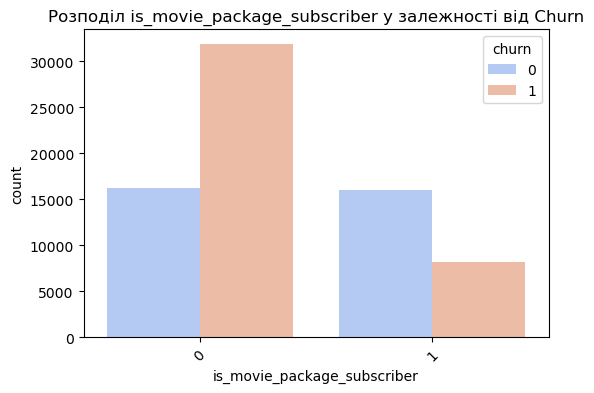

In [ ]:

# ============================================
#  Аналіз категоріальних змінних
# ============================================

for col in categorical_variables:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="churn", data=df, palette="coolwarm")
    plt.title(f"Розподіл {col} у залежності від Churn")
    plt.xticks(rotation=45)
    plt.show()

Абсолютна кількість клієнтів, що пішли, більша серед абонентів цих послуг (бо їх загалом більше). Однак, якщо подивитися на співвідношення всередині кожної групи, то відсотковий рівень відтоку вищий серед тих, хто не має підписки. Це може свідчити про те, що додаткові послуги підвищують лояльність клієнта.

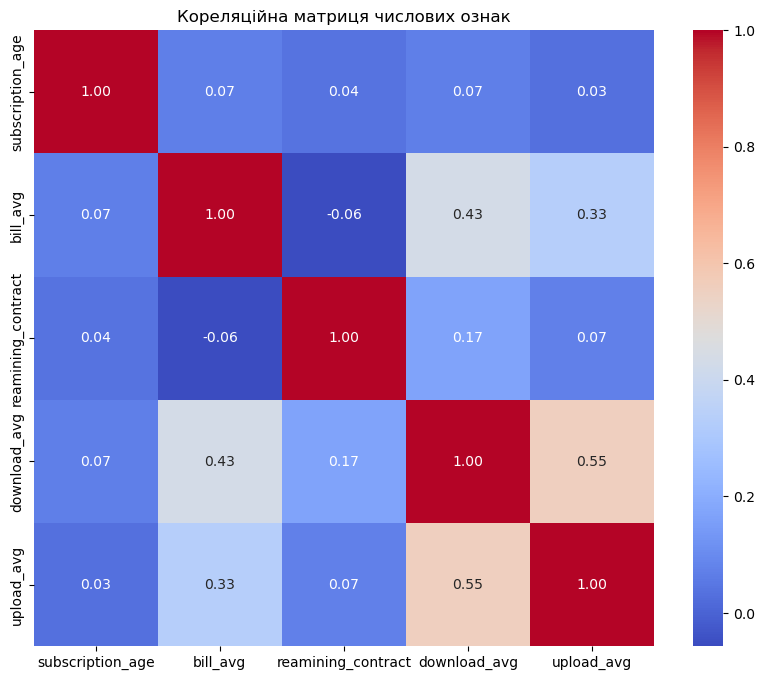

In [ ]:

# ============================================
#  Кореляційний аналіз (для числових змінних)
# ============================================

plt.figure(figsize=(10,8))
sns.heatmap(df[continuous_variables].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця числових ознак")
plt.show()

Кореляційна матриця для неперервних змінних показує відсутність сильної мультиколінеарності. Найбільш значущі кореляції є логічними та очікуваними. Це хороший знак для побудови моделей машинного навчання, оскільки означає, що кожна з цих ознак несе переважно унікальну інформацію і не дублює інші.

In [ ]:
# Аналіз пропусків 

# 1, якщо значення reamining_contract НЕ пропущене (.notna())
# 0, якщо значення reamining_contract ПРОПУЩЕНЕ (тобто, немає інформації про контракт)
df['has_contract_info'] = df['reamining_contract'].notna().astype(int)

# 2. Перейменовуємо мітки для кращої візуалізації
# (Необов'язково, але робить графік зрозумілішим)
df['has_contract_info'] = df['has_contract_info'].replace({
    0: 'Немає інформації про контракт (NaN)', 
    1: 'Є інформація про контракт'
})

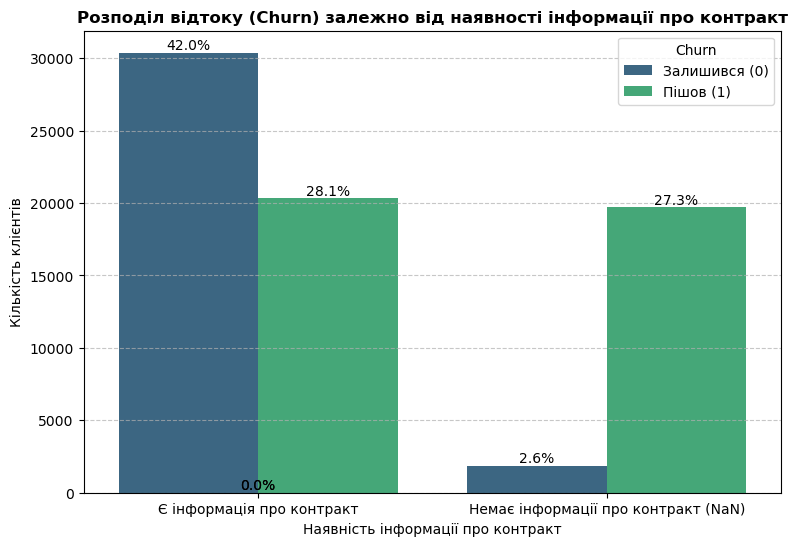


Аналіз співвідношення відтоку в кожній групі:
churn                                        0          1
has_contract_info                                        
Є інформація про контракт            59.900990  40.099010
Немає інформації про контракт (NaN)   8.589839  91.410161


In [ ]:
plt.figure(figsize=(9, 6))

sns.countplot(x='has_contract_info', hue='churn', data=df, palette='viridis')

for p in plt.gca().patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    total = len(df)
    
    plt.gca().annotate(f'{h/total:.1%}', (x + w / 2., h), ha='center', va='bottom', fontsize=10)

plt.title('Розподіл відтоку (Churn) залежно від наявності інформації про контракт', fontweight='bold')
plt.xlabel('Наявність інформації про контракт')
plt.ylabel('Кількість клієнтів')
plt.legend(title='Churn', labels=['Залишився (0)', 'Пішов (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Додатковий аналіз: співвідношення Churn=1 до Churn=0 в кожній групі
print("\nАналіз співвідношення відтоку в кожній групі:")
churn_ratio = df.groupby('has_contract_info')['churn'].value_counts(normalize=True).mul(100).unstack()
print(churn_ratio)

Група "Є інформація про контракт":
Загальна кількість клієнтів у цій групі значно більша.
Співвідношення між тими, хто залишився (0), і тими, хто пішов (1), є більш збалансованим. Відтік становить менше половини клієнтів.

Група "Немає інформації про контракт (NaN)":
Ця група становить близько 30% від усіх клієнтів (як ми і виявили за кількістю пропусків).
Тут домінує червоний стовпець (Churn=1)! Це означає, що клієнти, у яких немає інформації про залишок контракту (тобто, вони, ймовірно, на гнучких/безстрокових планах), йдуть у відтік значно частіше, ніж залишаються.

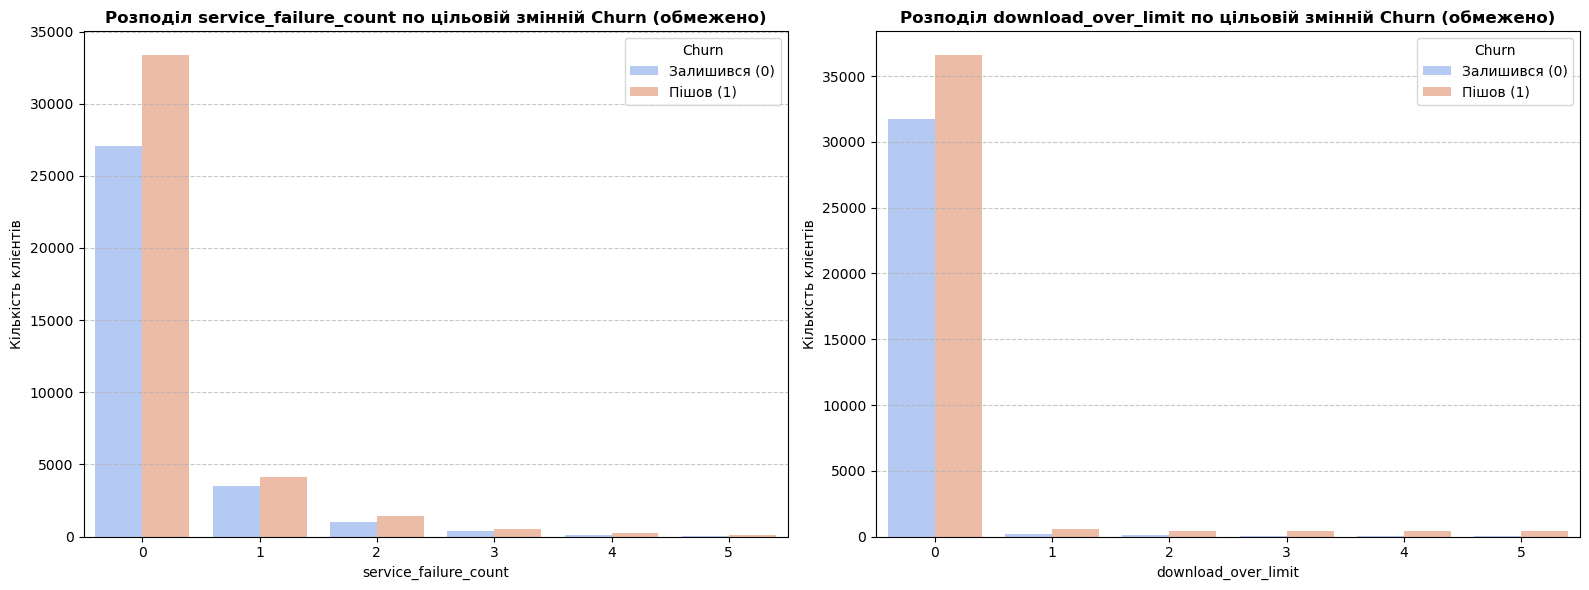

In [ ]:
# Візуалізація дискретних/кількісних змінних

# Список дискретних змінних
discrete_variables = ['service_failure_count', 'download_over_limit']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, var in enumerate(discrete_variables):
    df_limited = df[df[var] <= 5] 
    
    sns.countplot(x=var, hue='churn', data=df_limited, ax=axes[i], palette='coolwarm')
    
    # Налаштування графіку
    axes[i].set_title(f'Розподіл {var} по цільовій змінній Churn (обмежено)', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Кількість клієнтів')
    axes[i].legend(title='Churn', labels=['Залишився (0)', 'Пішов (1)'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Технічні проблеми (збої, перевищення ліміту) є тригерами до відтоку.

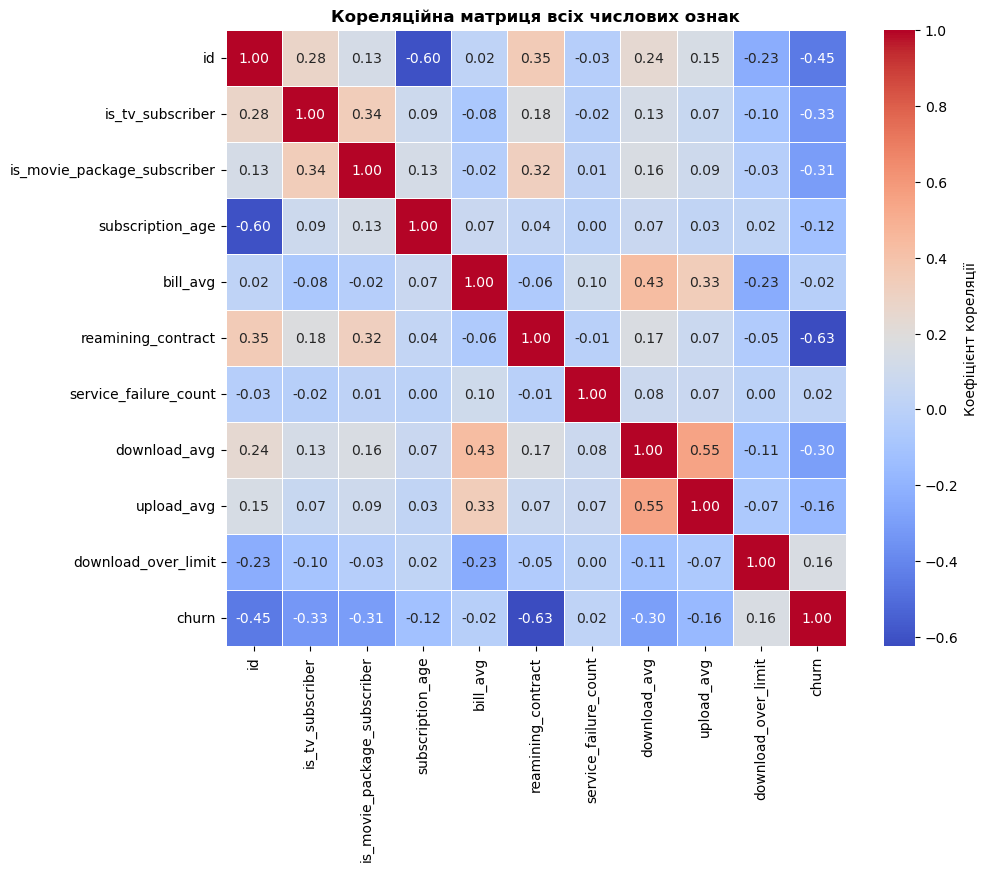

In [ ]:
# Збираємо всі числові змінні, включаючи цільову
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))

# Будуємо Heatmap для кореляційної матриці
sns.heatmap(df[numeric_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Коефіцієнт кореляції'})

plt.title("Кореляційна матриця всіх числових ознак", fontweight='bold')
plt.show()

## Ключові закономірності та висновки
- На основі проведеного аналізу можна сформулювати ключові закономірності, що впливають на відтік клієнтів.

Профіль клієнта, схильного до відтоку:  

Не має довгострокового контракту або його контракт добігає кінця (reamining_contract ≈ 0 або NaN).  

Новий клієнт (мала subscription_age).  

Неактивний користувач (низькі або нульові download_avg та upload_avg).  

Стикався з проблемами сервісу (service_failure_count > 0).  

Не користується додатковими послугами (не підписаний на ТБ чи пакети фільмів).  

- Профіль лояльного клієнта:  

Має довгостроковий контракт, до закінчення якого ще далеко.  

Є клієнтом компанії протягом тривалого часу.  

Активно користується інтернетом (високі показники трафіку).  

Підключив додаткові послуги.  

- Рекомендації для подальших кроків  
Очищення даних:  

Виправити аномальні значення в subscription_age (наприклад, замінити від'ємні на 0).  

Дослідити та, можливо, обробити викиди в bill_avg, download_avg, upload_avg (наприклад, за допомогою логарифмування або обмеження за квантилями), якщо вони будуть негативно впливати на модель.  